In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Bar Charts

A **bar chart** is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.

In [2]:
pokemon = pd.read_csv('data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


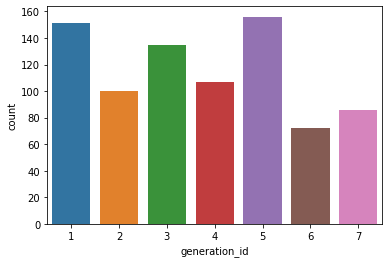

In [3]:
sb.countplot(data=pokemon, x='generation_id');

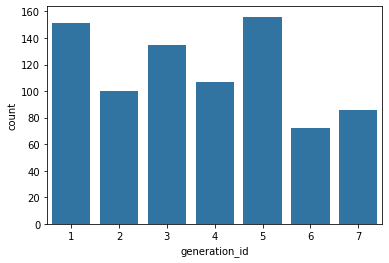

In [4]:
base_color = sb.color_palette()[0]
sb.countplot(data=pokemon, x='generation_id', color=base_color);

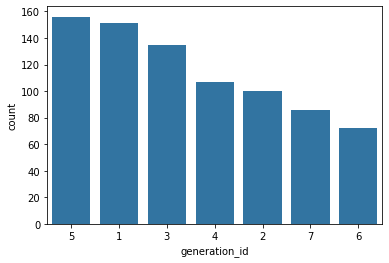

In [5]:
gen_order = pokemon['generation_id'].value_counts().index
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

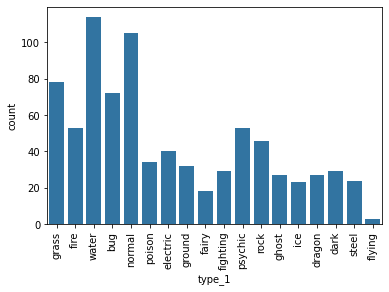

In [6]:
sb.countplot(data=pokemon, x='type_1', color=base_color)
plt.xticks(rotation=90);

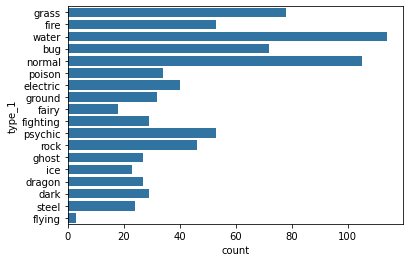

In [7]:
sb.countplot(data=pokemon, y='type_1', color=base_color);

In [8]:
pokemon_types = pokemon.melt(
    id_vars=['id', 'species'],
    value_vars=['type_1', 'type_2'],
    var_name='type_level',
    value_name='type'
).dropna()
pokemon_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


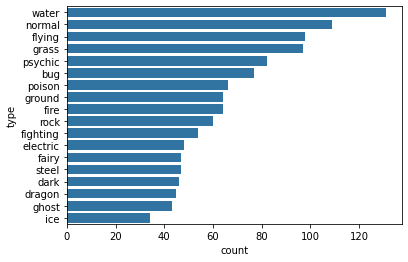

In [9]:
type_counts = pokemon_types['type'].value_counts()
type_order = type_counts.index
sb.countplot(data=pokemon_types, y='type', color=base_color, order=type_order);

0.1623296158612144


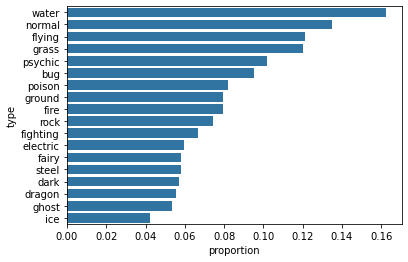

In [10]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_proportion = max_type_count / n_pokemon
print(max_proportion)
tick_props = np.arange(0, max_proportion, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
sb.countplot(data=pokemon_types, y='type', color=base_color, order=type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

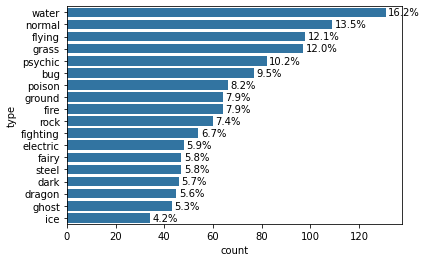

In [11]:
sb.countplot(data=pokemon_types, y='type', color=base_color, order=type_order)
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100 * count / n_pokemon)
    plt.text(count + 1, i, pct_string, va='center');

# Histograms

A **histogram** is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number.

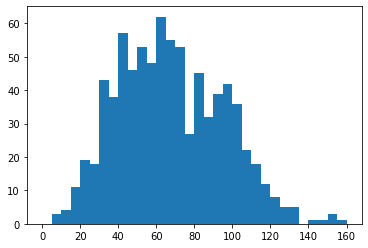

In [12]:
bins = np.arange(0, pokemon['speed'].max() + 5, 5)
plt.hist(data=pokemon, x='speed', bins=bins);

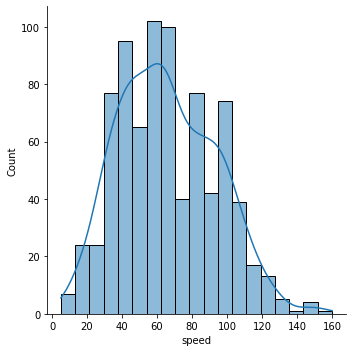

In [13]:
sb.displot(pokemon['speed'], kde=True);

# Figures, Axes and Subplots

The base of a visualization in matplotlib is a **Figure** object. Contained within each Figure will be one or more Axes objects, each **Axes** object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly.

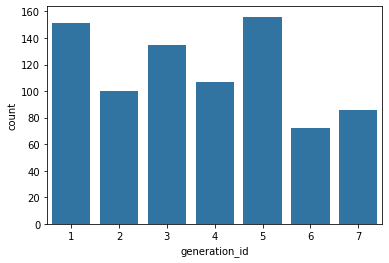

In [14]:
fig = plt.figure()
# (.125, .125) are the position of the lower-left hand corner
# the other params are the axes width and height
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data=pokemon, x='generation_id', color=base_color, ax=ax);

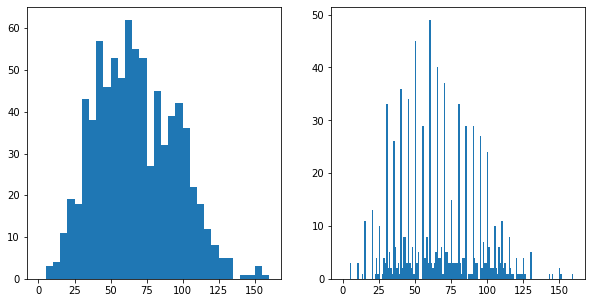

In [15]:
plt.figure(figsize=[10, 5])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.hist(data=pokemon, x='speed', bins=np.arange(0, pokemon['speed'].max() + 5, 5))

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
plt.hist(data=pokemon, x='speed', bins=np.arange(0, pokemon['speed'].max() + 1, 1));

# Descriptive Statistics

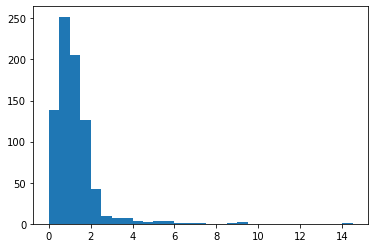

In [16]:
bins = np.arange(0, pokemon['height'].max() + 0.5, 0.5)
plt.hist(data=pokemon, x='height', bins=bins);

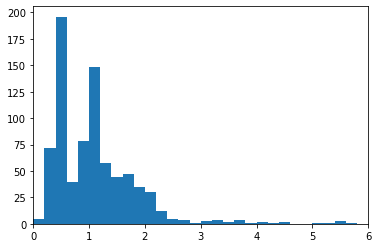

In [17]:
bins = np.arange(0, pokemon['height'].max() + 0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins)
plt.xlim((0, 6));

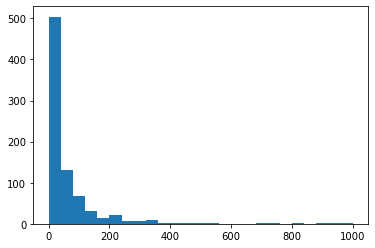

In [18]:
bins = np.arange(0, pokemon['weight'].max() + 40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

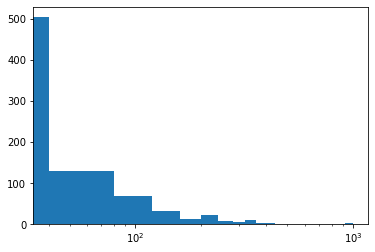

In [19]:
bins = np.arange(0, pokemon['weight'].max() + 40, 40)
plt.hist(data=pokemon, x='weight', bins=bins)
plt.xscale('log');

In [20]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [21]:
np.log10(pokemon['weight']).describe()

count    807.000000
mean       1.364366
std        0.670968
min       -1.000000
25%        0.954243
50%        1.431364
75%        1.799341
max        2.999957
Name: weight, dtype: float64

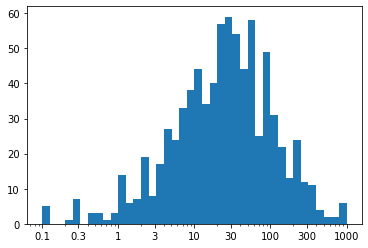

In [22]:
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = [str(v) for v in ticks]
plt.hist(data=pokemon, x='weight', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels);

# Extra: Waffle Plots

One alternative univariate plot type that you might see for categorical data is the **waffle plot**, also known as the square pie chart. While the standard pie chart uses a circle to represent the whole, a waffle plot is plotted onto a square divided into a 10x10 grid. Each small square in the grid represents one percent of the data, and a number of squares are colored by category to indicate total proportions. Compared to a pie chart, it is much easier to make precise assessments of relative frequencies.

In [23]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

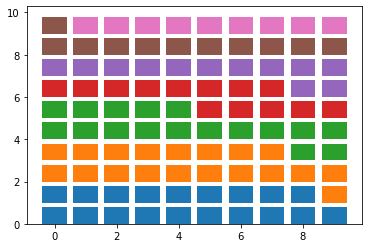

In [24]:
waffle_counts = percentage_blocks(pokemon, 'generation_id')

prev_count = 0
# for each category,
for cat in waffle_counts.index:
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

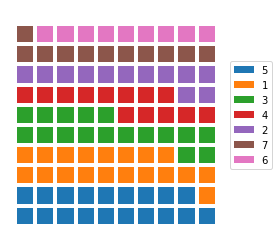

In [25]:
waffle_counts = percentage_blocks(pokemon, 'generation_id')

prev_count = 0
# for each category,
for cat in waffle_counts.index:
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');